In [1]:
import sqlite3

# Step 1: Connect to SQLite 
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Step 2: Create a sales table 
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")


cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        ("Apples", 10, 2.5),
        ("Bananas", 15, 1.2),
        ("Oranges", 8, 3.0),
        ("Apples", 5, 2.5),
        ("Bananas", 12, 1.2),
        ("Grapes", 20, 2.0),
    ]
    cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", sample_data)
    conn.commit()

conn.close()


In [2]:
import sqlite3
import pandas as pd

# Database connect
conn = sqlite3.connect("sales_data.db")

# SQL query: total quantity aur revenue nikalne ke liye
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Query result ko pandas DataFrame me load karo
df = pd.read_sql_query(query, conn)

# Data print karo
print("Sales Summary:\n")
print(df)

conn.close()


Sales Summary:

   product  total_qty  revenue
0   Apples         15     37.5
1  Bananas         27     32.4
2   Grapes         20     40.0
3  Oranges          8     24.0


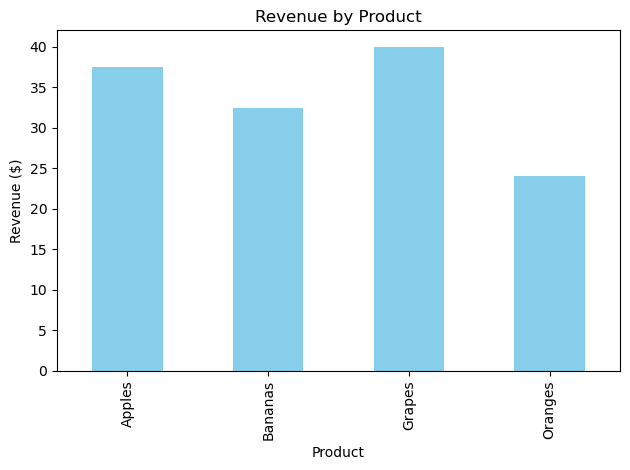

In [3]:
import matplotlib.pyplot as plt

# Bar chart banaye using pandas
df.plot(kind="bar", x="product", y="revenue", legend=False, color="skyblue")

plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.title("Revenue by Product")
plt.tight_layout()
plt.show()


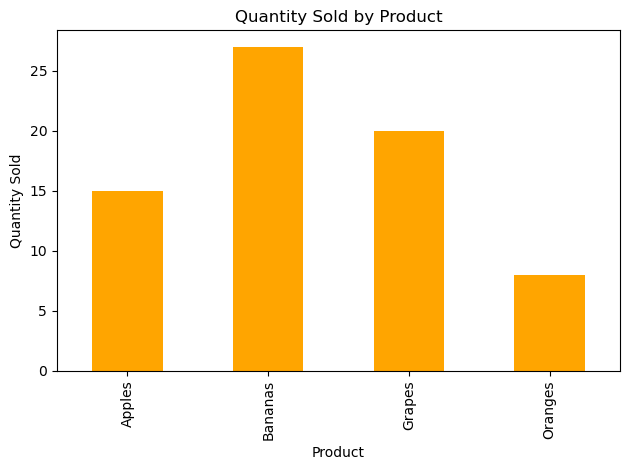

In [4]:
import matplotlib.pyplot as plt

# Quantity bar chart
df.plot(kind="bar", x="product", y="total_qty", legend=False, color="orange")

plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.title("Quantity Sold by Product")
plt.tight_layout()
plt.show()


In [5]:
# Export result to CSV
df.to_csv("sales_summary.csv", index=False)
print("✅ Sales summary exported to 'sales_summary.csv'")


✅ Sales summary exported to 'sales_summary.csv'
